## Dataset banknotes

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset

In [2]:
df = pd.read_csv('Datasets/banknotes.csv')
df.shape

(1372, 5)

In [3]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


### Seperating input and output variables

In [5]:
X = df.drop('Class', axis = 1)
y = df['Class']
X.shape, y.shape

((1372, 4), (1372,))

## Explore the data

Text(0.5, 0, 'Skewness')

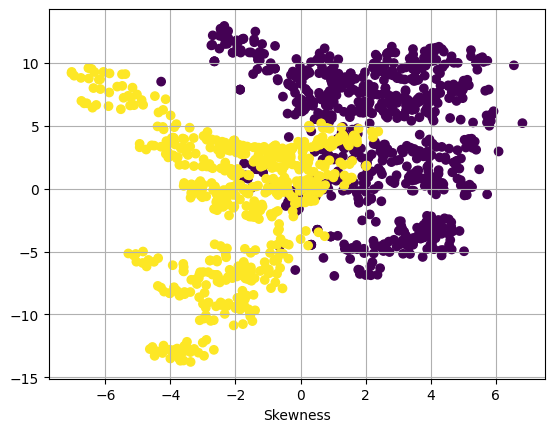

In [6]:
plt.scatter(df['Variance'], df['Skewness'], c = y)
plt.grid()
plt.xlabel('Variance')
plt.xlabel('Skewness')

<Axes: >

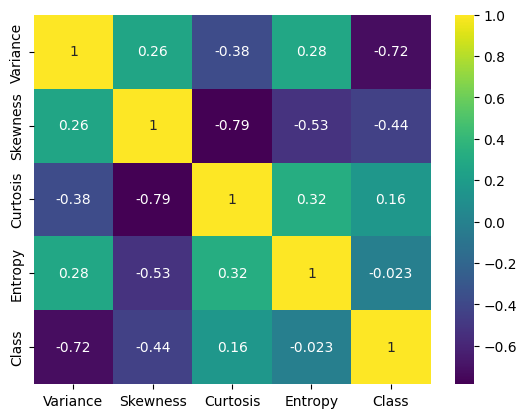

In [7]:
sns.heatmap(df.corr(), annot =True, cmap = 'viridis')

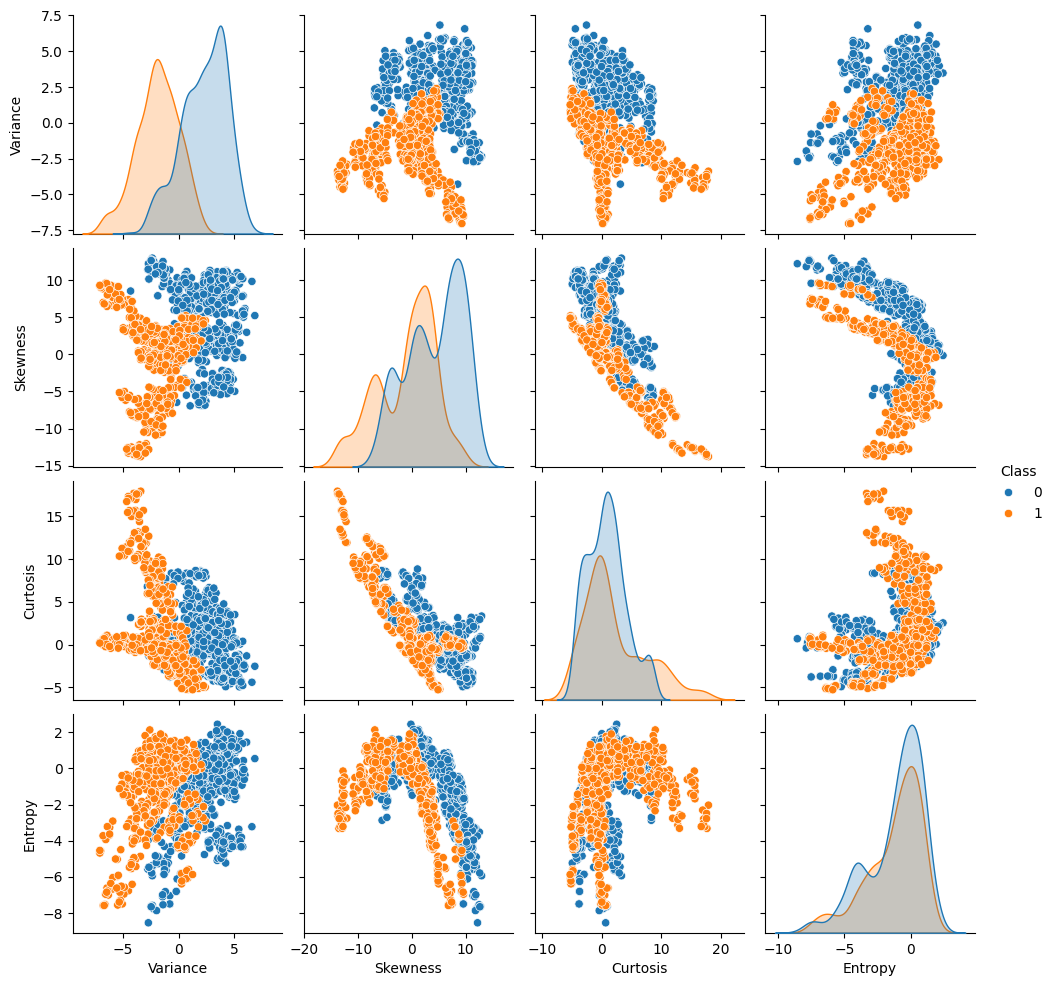

In [8]:
sns.pairplot(df, hue = 'Class')

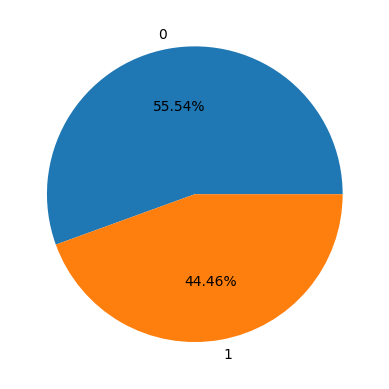

In [9]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct = '%2.2f%%');

In [10]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Cross Validation

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1029, 4), (343, 4), (1029,), (343,))

## Model Building

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## Performance Evaluation

In [42]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

Accuracy :  0.9795918367346939


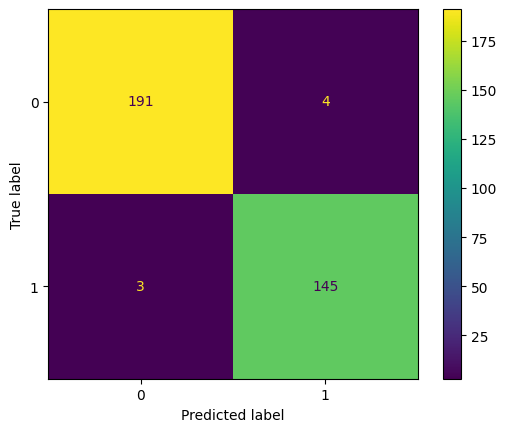

In [60]:
y_pred = dtc.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Feature Importance

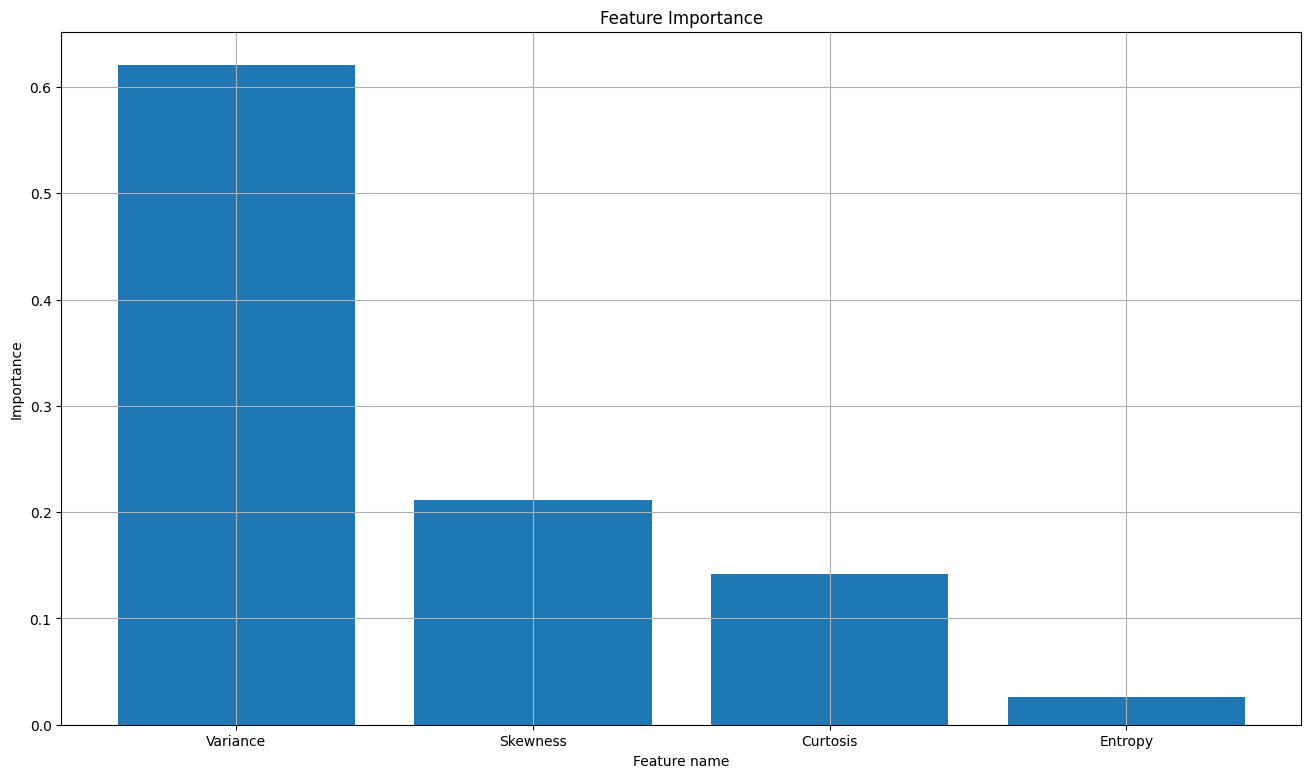

In [45]:
plt.figure(figsize=(16,9))
plt.bar(X.columns, dtc.feature_importances_)
plt.title('Feature Importance')
plt.xlabel('Feature name')
plt.ylabel('Importance')
plt.grid()

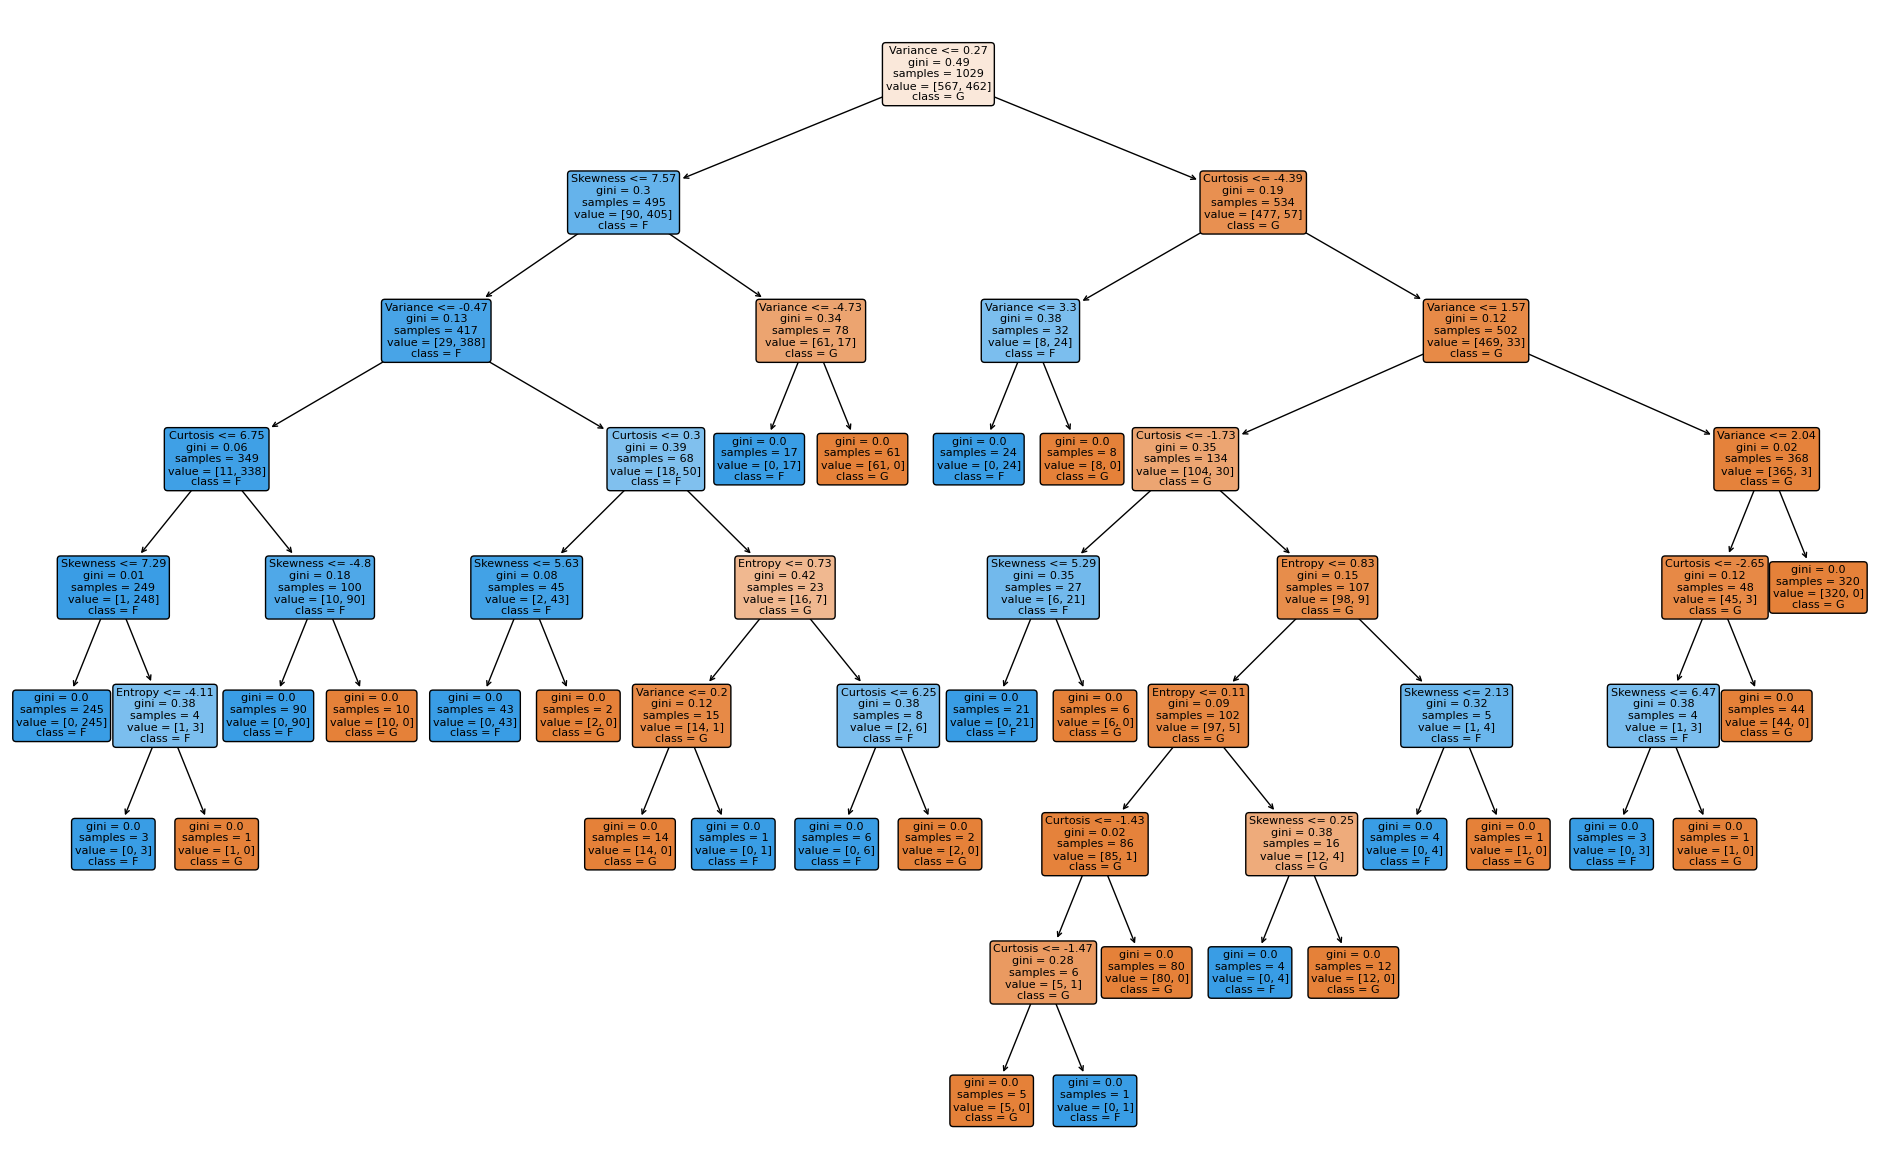

In [46]:
plt.figure(figsize=(24,15))
plot_tree(dtc, filled = True, feature_names = X.columns, class_names=['G', 'F'], fontsize = 8, rounded = True, precision =2)
plt.show()

## Validation 

In [47]:
new = pd.DataFrame([
    [0.40614, 1.34920, -14501, 0.55949],
    [3.45660, 9.52280, -4.0112, 3.59440],
    [4.54590, 8.16740, -2.4586, -1.46120]
], columns = X.columns)

new

,Variance,Skewness,Curtosis,Entropy
0,0.40614,1.3492,-14501.0000,0.55949
1,3.45660,9.5228,-4.0112,3.59440
2,4.54590,8.1674,-2.4586,-1.46120


In [48]:
dtc.predict(new)

array([1, 0, 0], dtype=int64)

In [49]:
### Random Forrest with 10 trees

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

Accuracy :  0.9941690962099126


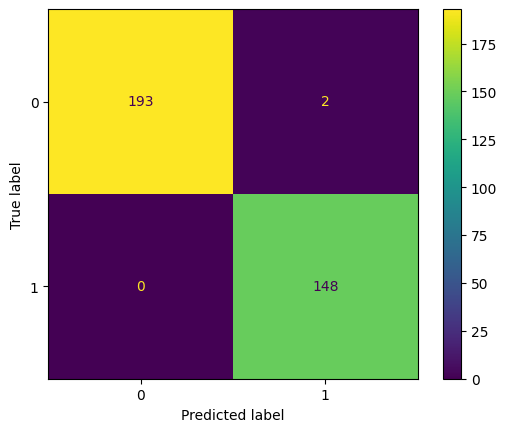

In [61]:
y_pred = rf.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

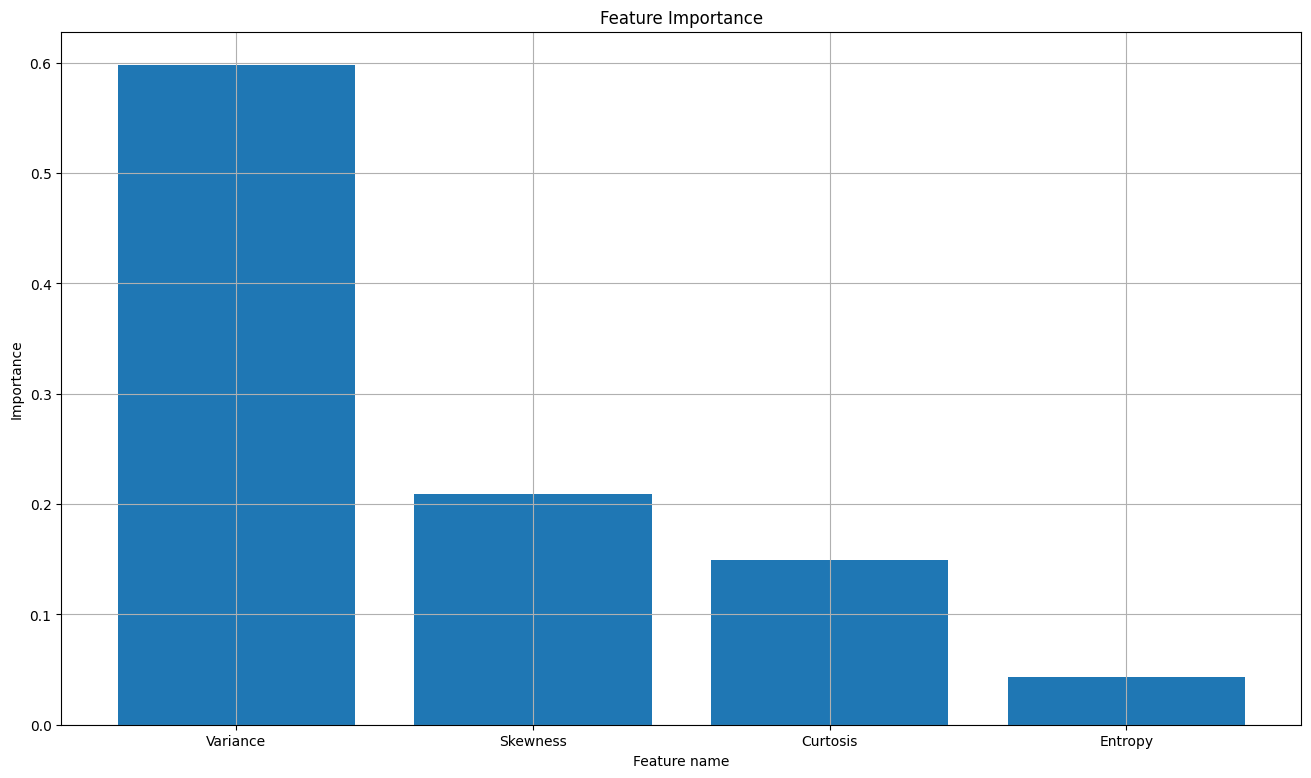

In [55]:
plt.figure(figsize=(16,9))
plt.bar(X.columns, rf.feature_importances_)
plt.title('Feature Importance')
plt.xlabel('Feature name')
plt.ylabel('Importance')
plt.grid()